In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
n = 5000
train_images = train_images[:n]
train_labels = train_labels[:n]

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
IMG_SHAPE = train_images.shape[1:]
base_model = tf.keras.applications.DenseNet121(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [6]:
base_model.trainable = False

In [7]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [8]:
inputs = tf.keras.Input(IMG_SHAPE)
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = layers.Dense(10)(x)
model = tf.keras.Model(inputs, outputs)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
densenet121 (Model)          (None, 1, 1, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 7,047,754
Trainable params: 10,250
Non-trainable params: 7,037,504
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
157/157 [==============================] - 84s 533ms/step - loss: 2.0451 - accuracy: 0.3124 - val_loss: 1.5485 - val_accuracy: 0.4603
Epoch 2/10
157/157 [==============================] - 93s 594ms/step - loss: 1.5126 - accuracy: 0.4708 - val_loss: 1.3701 - val_accuracy: 0.5255
Epoch 3/10
157/157 [==============================] - 80s 508ms/step - loss: 1.3521 - accuracy: 0.5366 - val_loss: 1.3044 - val_accuracy: 0.5449
Epoch 4/10
157/157 [==============================] - 80s 513ms/step - loss: 1.2688 - accuracy: 0.5586 - val_loss: 1.2704 - val_accuracy: 0.5634
Epoch 5/10
157/157 [==============================] - 83s 531ms/step - loss: 1.2094 - accuracy: 0.5730 - val_loss: 1.2437 - val_accuracy: 0.5758
Epoch 6/10
157/157 [==============================] - 78s 496ms/step - loss: 1.1588 - accuracy: 0.5886 - val_loss: 1.2349 - val_accuracy: 0.5752
Epoch 7/10
157/157 [==============================] - 132s 844ms/step - loss: 1.1220 - accuracy: 0.6100 - val_loss: 1.2267 - val_a

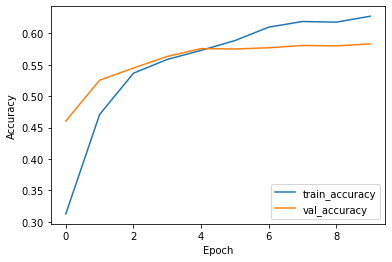

In [14]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

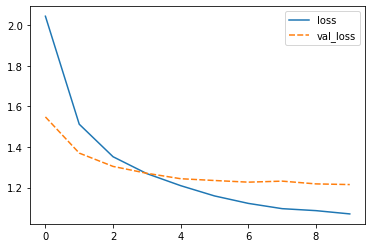

In [15]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['loss', 'val_loss']])